In [1]:
import warnings
warnings.filterwarnings("ignore")
#Introduce the basic package of data science.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
##Set attributes to prevent garbled characters in Chinese.
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
#Introduce machine learning, preprocessing, model selection, and evaluation indicators.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
#Import the Boston dataset used this time.
from sklearn.datasets import load_boston
#Introduce algorithms.
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNet
#Compared with SVC, it is the regression form of SVM.
from sklearn.svm import SVR
#Integrate algorithms.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# **Loading the Data Set, Viewing Data Attributes, and Visualizing the Data**

In [2]:
#Load the Boston house price data set.
boston = load_boston()
#x features, and y labels.
x = boston.data
y = boston.target
#Display related attributes.
print('Feature column name')
print(boston.feature_names)
print("Sample data volume: %d, number of features: %d"% x.shape)
print("Target sample data volume: %d"% y.shape[0])


Feature column name
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Sample data volume: 506, number of features: 13
Target sample data volume: 506


In [3]:
x = pd.DataFrame(boston.data, columns=boston.feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot:>

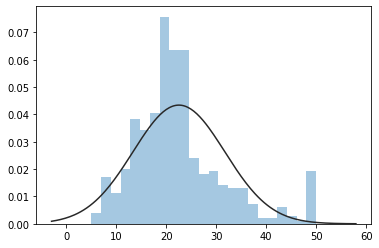

In [4]:
sns.distplot(tuple(y), kde=False, fit=st.norm)

# **Spliting and Pre-processing the Data Set**

In [5]:
#Segment the data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28)
#Standardize the data set.
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
x_train[0:100]

array([[-0.35703125, -0.49503678, -0.15692398, ..., -0.01188637,
         0.42050162, -0.29153411],
       [-0.39135992, -0.49503678, -0.02431196, ...,  0.35398749,
         0.37314392, -0.97290358],
       [ 0.5001037 , -0.49503678,  1.03804143, ...,  0.81132983,
         0.4391143 ,  1.18523567],
       ...,
       [-0.34697089, -0.49503678, -0.15692398, ..., -0.01188637,
         0.4391143 , -1.11086682],
       [-0.39762221,  2.80452783, -0.87827504, ...,  0.35398749,
         0.4391143 , -1.28120919],
       [-0.38331362,  0.41234349, -0.74566303, ...,  0.30825326,
         0.19472652, -0.40978832]])

# **Using Various Regression Models to Model Data Sets**


In [6]:
#Set the model name.
names = ['LinerRegression',
'Ridge',
'Lasso',
'Random Forrest',
'GBDT',
'Support Vector Regression',
'ElasticNet',
'XgBoost']
#Define the model.
# cv is the cross-validation idea here.
models = [LinearRegression(),
RidgeCV(alphas=(0.001,0.1,1),cv=3),
LassoCV(alphas=(0.001,0.1,1),cv=5),
RandomForestRegressor(n_estimators=10),
GradientBoostingRegressor(n_estimators=30),
SVR(),
ElasticNet(alpha=0.001,max_iter=10000),
XGBRegressor()]
# Output the R2 scores of all regression models.
#Define the R2 scoring function.
def R2(model,x_train, x_test, y_train, y_test):
 model_fitted = model.fit(x_train,y_train)
 y_pred = model_fitted.predict(x_test)
 score = r2_score(y_test, y_pred)
 return score
#Traverse all models to score.
for name,model in zip(names,models):
 score = R2(model,x_train, x_test, y_train, y_test)
 print("{}: {:.6f}".format(name,score.mean()))

LinerRegression: 0.564115
Ridge: 0.563673
Lasso: 0.564049
Random Forrest: 0.733632
GBDT: 0.739810
Support Vector Regression: 0.517260
ElasticNet: 0.563992
XgBoost: 0.759977


# **Adjusting Hyperparameters by Grid Search**

In [7]:
'''
'kernel': kernel function
 'C': SVR regularization factor
 'gamma': 'rbf', 'poly' and 'sigmoid' kernel function coefficient, which affects the model performance
'''
parameters = {
'kernel': ['linear', 'rbf'],
 'C': [0.1, 0.5,0.9,1,5],
 'gamma': [0.001,0.01,0.1,1]
}
#Use grid search and perform cross validation.
model = GridSearchCV(SVR(), param_grid=parameters, cv=3)
model.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 0.9, 1, 5],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [8]:
print("Optimal parameter list:", model.best_params_)
print("Optimal model:", model.best_estimator_)
print("Optimal R2 value:", model.best_score_)


Optimal parameter list: {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Optimal model: SVR(C=5, gamma=0.1)
Optimal R2 value: 0.7965173649188232


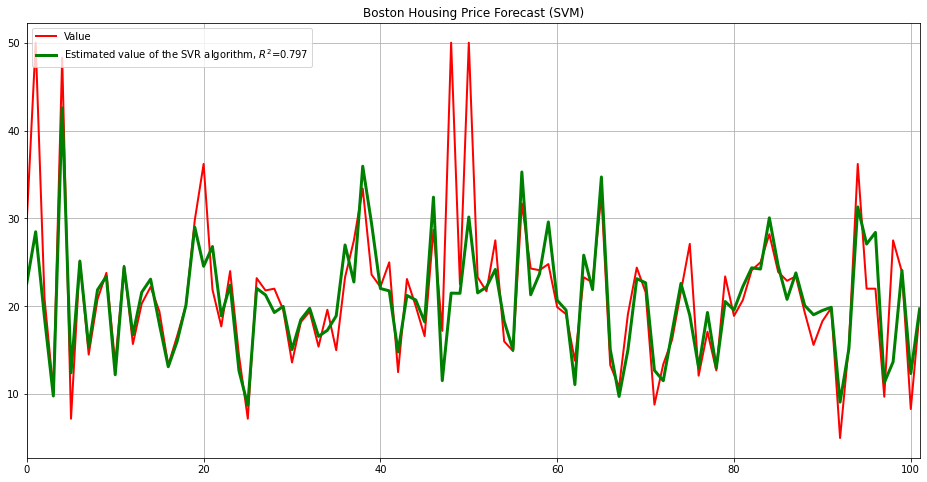

In [9]:
##Perform visualization.
ln_x_test = range(len(x_test))
y_predict = model.predict(x_test)
#Set the canvas.
plt.figure(figsize=(16,8), facecolor='w')
#Draw with a red solid line.
plt.plot (ln_x_test, y_test, 'r-', lw=2, label=u'Value')
#Draw with a green solid line.
plt.plot (ln_x_test, y_predict, 'g-', lw = 3, label=u'Estimated value of the SVR algorithm, $R^2$=%.3f' %
(model.best_score_))
#Display in a diagram.
plt.legend(loc ='upper left')
plt.grid(True)
plt.title(u"Boston Housing Price Forecast (SVM)")
plt.xlim(0, 101)
plt.show()